In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Create Soundfield Plots

In [5]:
filenames = ["axial_+","axial_-"]

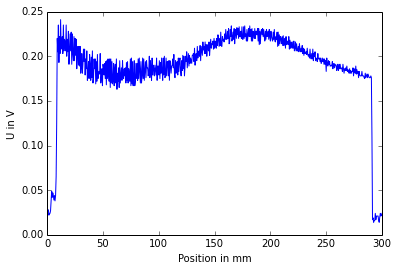

In [6]:
for name in filenames:
    data = pd.read_csv(name+".dat", decimal=',', delimiter='\t')
    pos = data["Position[mm]"][:-1]
    amp = data["Voltage[V]"][:-1]
    plt.close()
    plt.plot(pos,amp)
    plt.xlabel("Position in mm")
    plt.ylabel("U in V")
    plt.savefig("%s.pdf"%name)
    

## Lateral Soundfieldplot
Dieses bringt es nicht wirklich da man bei 5 graphen pro plot nichts mehr sieht

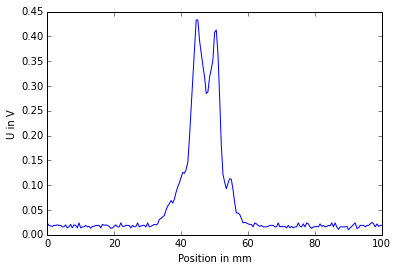

In [8]:

for i in range(5):
    plt.close()
    data_plus = pd.read_csv("lateral_%i+.dat"%i, delimiter='\t', decimal=',')
    data_minus = pd.read_csv("lateral_%i-.dat"%i, delimiter='\t', decimal=',')
    amp_plus = data_plus["Voltage[V]"][:-1]
    amp_minus = data_minus["Voltage[V]"][:-1]
    pos = data_plus["Position[mm]"][:-1]
    plt.plot(pos , amp_plus)
    plt.xlabel("Position in mm")
    plt.ylabel("U in V")
    plt.savefig("lateral_+_%i.pdf"%i)

#Nahfeldlänge berechnen

In [34]:
# Konstanten
f = 2e6 # Hz
d = 0.018 #m
c = 1484

In [35]:
wl = c/f
x = (d**2-wl**2)/(4*wl)

In [16]:
wl

0.000742

In [18]:
d*1e3

18.0

In [1]:
def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True
 
    return array(maxtab), array(mintab)


In [29]:
maxi, mini = peakdet(amp,.05,x=pos) 

In [14]:
from numpy import *

In [38]:
(maxi[1][0]-x*1e3)/(x*1e3)

56.02107951482482

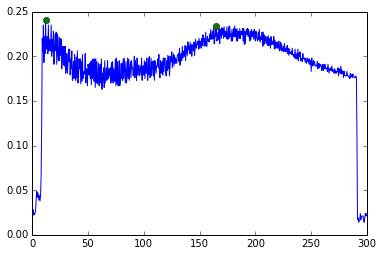

In [30]:
plt.plot(pos,amp)
plt.plot(maxi.T[0],maxi.T[1],'o')